In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler

#### `Feature_df`

In [ ]:
feature_df = data[['id', 'name']]

feature_df['host_response_in_1_hour'] = data['host_response_time'].apply(
    lambda x: 1 if x == 'within an hour' else 0)
feature_df['host_response_rate100'] = data['host_response_rate'].apply(
    lambda x: int(x == '100%') if isinstance(x, str) else 0)
feature_df['host_acceptance_rate100'] = data['host_acceptance_rate'].apply(
    lambda x: int(x == '100%') if isinstance(x, str) else 0)
feature_df['host_is_superhost'] = data['host_is_superhost'].apply(
    lambda x: int(x == 't') if isinstance(x, str) else 0)
feature_df['host_identity_verified'] = data['host_identity_verified'].apply(
    lambda x: int(x == 't') if isinstance(x, str) else 0)
feature_df['room_type_private_room'] = data['room_type'].apply(
    lambda x: int(x == 'Private room') if isinstance(x, str) else 0)
feature_df['room_type_entire_home'] = data['room_type'].apply(
    lambda x: int(x == 'Entire home/apt') if isinstance(x, str) else 0)
feature_df['charge_extra_people_fee'] = data['extra_people'].apply(
    lambda x: int(x != '$0.00') if isinstance(x, str) else 0)

feature_df['cancellation_policy_flexible'] = data['cancellation_policy'].apply(
    lambda x: int(x == 'flexible') if isinstance(x, str) else 0)
feature_df['cancellation_policy_moderate'] = data['cancellation_policy'].apply(
    lambda x: int(x == 'moderate') if isinstance(x, str) else 0)
feature_df['cancellation_policy_strict'] = data['cancellation_policy'].apply(
    lambda x: int(x == 'strict_14_with_grace_period')
    if isinstance(x, str) else 0)
feature_df['instant_bookable'] = data['instant_bookable'].apply(
    lambda x: int(x == 't') if isinstance(x, str) else 0)

In [3]:
np.random.seed(42)
height = np.random.normal(loc=170, scale=5, size=1000).reshape(-1, 1)
weight = np.random.normal(loc=60, scale=10, size=1000).reshape(-1, 1)

test_arr = np.concatenate((height, weight), axis=1)

std_sca = StandardScaler()
mm_sca = MinMaxScaler()
ma_sca = MaxAbsScaler()
nor_sca = Normalizer()
rbt_sca = RobustScaler()

test_nor = nor_sca.fit_transform(test_arr)
test_ma = ma_sca.fit_transform(test_arr)
test_mm = mm_sca.fit_transform(test_arr)
test_std = std_sca.fit_transform(test_arr)
test_rbt = rbt_sca.fit_transform(test_arr)

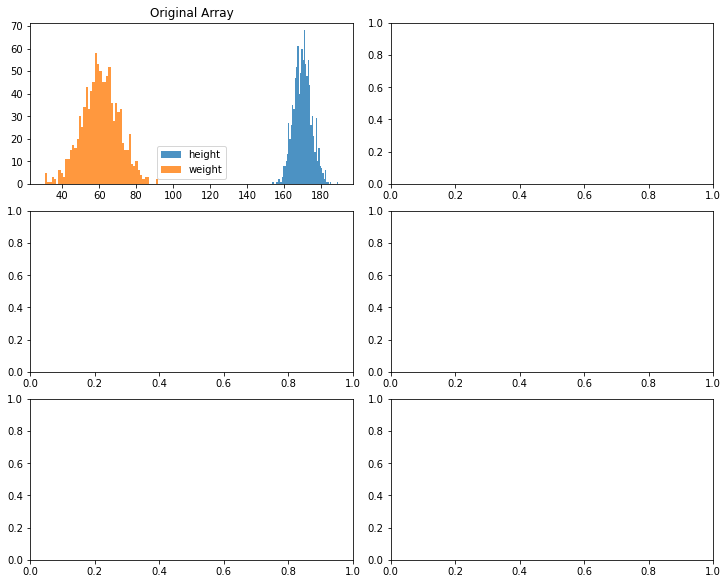

In [4]:
_, axes = plt.subplots(3, 2, figsize=(10, 8), constrained_layout=True)

titles = [
    'Original Array', 'After Unit Normalization',
    'After Min-Max Normalization', 'After Max-Abs Normalization',
    'After Standardization', 'After Robust Normalization'
]

for (ind, array), ax in zip(
        enumerate([test_arr, test_nor, test_mm, test_ma, test_std, test_rbt]),
        axes.flatten()):

    ax.hist(array[:, 0:1], bins=50, alpha=0.8, label='height')
    ax.hist(array[:, 1:2], bins=50, alpha=0.8, label='weight')

    ax.set(title=f'{titles[ind]}')

    ax.legend()
    plt.show()